In [71]:
import sys

import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2, norm

sys.path.append('..')
from higgs_inference import settings
from higgs_inference.various.utils import format_number

In [60]:
thetas = settings.thetas

# Plot four theta for each approach

In [84]:
def plot_neyman_distributions(output_filename, filename, folder='parameterized', n_bins=51):
    
    thetas_plot = [3,429,391]
    thetas_labels = ['1', '2', '3']
    
    nulls = np.load('../results/' + folder
                   +'/neyman_llr_vs_sm_nulls_'
                   + filename + '.npy')
    alternates = np.load('../results/' + folder
                           +'/neyman_llr_vs_sm_alternates_'
                           + filename + '.npy')
    qcuts = np.load('../results/' + folder
                           +'/neyman_qcut_'
                           + filename + '.npy')
    qmedians = np.load('../results/' + folder
                           +'/neyman_qmedian_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/neyman_pvalues_' + filename + '.npy')
    
    plt.figure(figsize=(4. * len(thetas_plot),4.))
    
    for i, (t, label) in enumerate(zip(thetas_plot, thetas_labels)):
        
        xmin = min(np.percentile(nulls[t], 2.), np.percentile(alternates[t], 2.))
        xmax = max(np.percentile(nulls[t], 98.), np.percentile(alternates[t], 98.))
        xmin = xmin - (xmax - xmin) * 0.1
        xmax = xmax + (xmax - xmin) * 0.1
        
        xvals = np.linspace(xmin, xmax, 200)
        
        gaussian_null = norm(np.mean(nulls[t]), np.std(nulls[t]))
        gaussian_null_qcuts = np.array([gaussian_null.ppf(cl) for cl in settings.confidence_levels])
        
        gaussian_alternate = norm(np.mean(alternates[t]), np.std(alternates[t]))
        gaussian_alternate_qmedian = gaussian_alternate.ppf(0.5)
        
        plt.subplot(1, len(thetas_plot), i+1)
        
        plt.hist(nulls[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', alpha=0.2)
        plt.hist(alternates[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', alpha=0.2)
        plt.hist(nulls[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', histtype='step')
        plt.hist(alternates[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', histtype='step')
        
        plt.plot(xvals, gaussian_null.pdf(xvals), color='C0', ls=':', lw=2.)
        plt.plot(xvals, gaussian_alternate.pdf(xvals), color='C1', ls=':', lw=2.)
        
        for j, x in enumerate(qcuts[t]):
            plt.axvline(x=x, ls='-', c='C0', label=r'Null: 68%, 95%, 99.7% CL cuts' if j == 0 else None)
        plt.axvline(x=qmedians[t], ls='-', c='C1', label=r'Alternate: median ($p = ' + format_number(p_values[t], 3) + '$)')
        
        for j, x in enumerate(gaussian_null_qcuts):
            plt.axvline(x=x, ls=':', c='C0')
        plt.axvline(x=gaussian_alternate_qmedian, ls=':', c='C1')
        
        plt.legend()
        
        plt.xlabel(r'$q(\theta_{' + label + r'})$')
        plt.ylabel(r'$p(q(\theta_{' + label + r'}))$')
        plt.xlim(xmin, xmax)
        plt.ylim(0., None)

    plt.tight_layout()
    plt.savefig('../figures/neyman/neyman_distribution_' + output_filename + '.pdf')

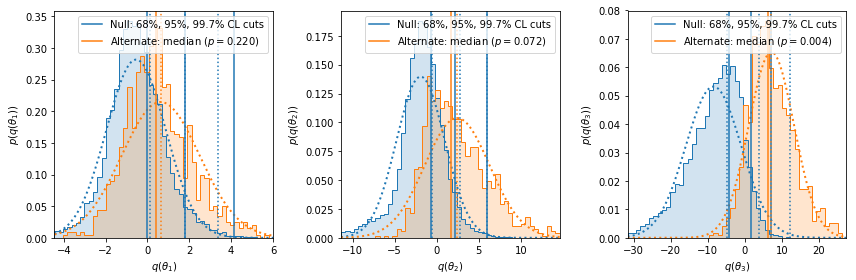

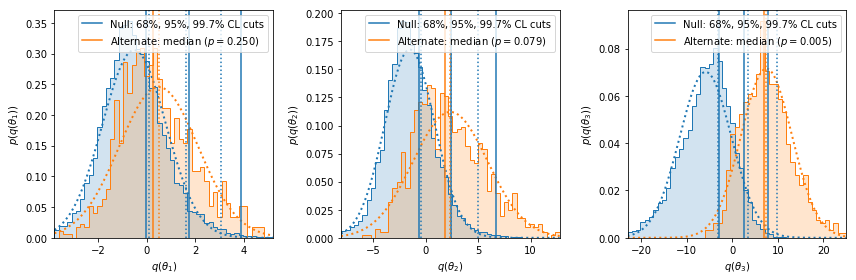

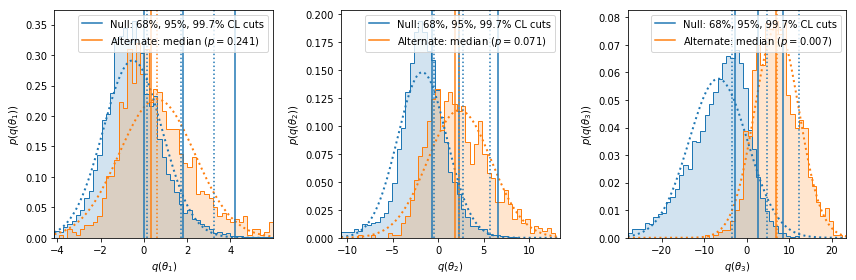

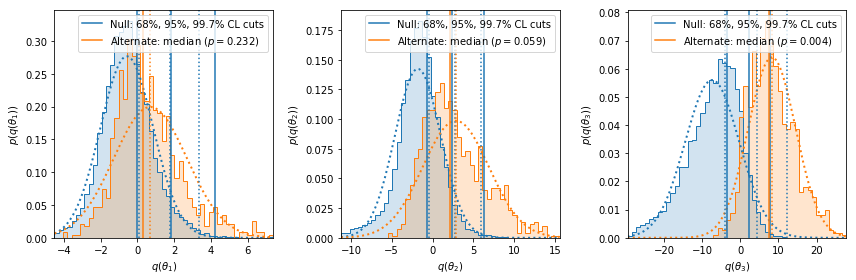

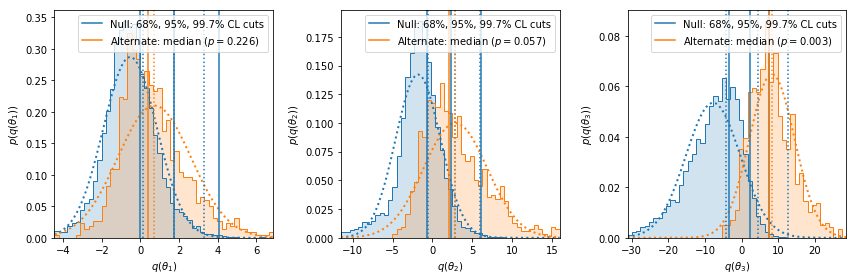

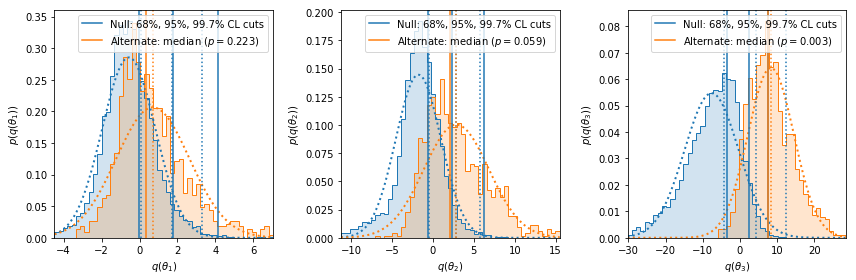

In [85]:
plot_neyman_distributions('truth', 'truth', 'truth')
# plot_neyman_distributions('histo', 'histo_2d_new', 'histo')
plot_neyman_distributions('carl', 'carl_calibrated_shallow_new', 'parameterized')
plot_neyman_distributions('scoreregression', 'scoreregression_score_deep_new', 'score_regression')
plot_neyman_distributions('regression', 'regression_calibrated_new', 'parameterized')
plot_neyman_distributions('combined', 'combined_calibrated_deep_new', 'parameterized')
plot_neyman_distributions('combinedregression', 'combinedregression_calibrated_deep_new', 'parameterized')


# Plot and analyse points with worst agreement

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in subtract


279 [-0.46064607 -0.42500025] 0.007399999999999962 0.005199999999999982


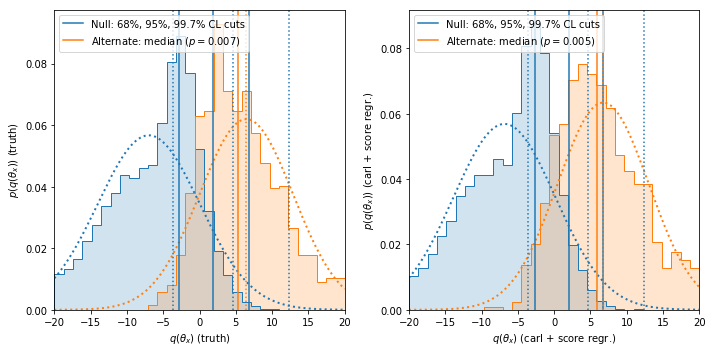

In [87]:
filenames = ['truth', 'combined_calibrated_deep_new']
folders = ['truth', 'parameterized']
labels = ['truth', 'carl + score regr.']

n_bins = 31
xmin, xmax = -20., 20.


p_values_list = [np.load('../results/' + folder + '/neyman_pvalues_' + filename + '.npy')
                 for filename, folder in zip(filenames, folders)]

errors = np.log(p_values_list[1]) - np.log(p_values_list[0])
errors[np.invert(np.isfinite(errors))] = 0.
errors[p_values_list[0] < 0.003] = 0.
t = np.nanargmin( errors )
print(t, thetas[t], p_values_list[0][t], p_values_list[1][t])

plt.figure(figsize=(10.,5.))

for i, (filename, folder, label) in enumerate(zip(filenames, folders, labels)):

    nulls = np.load('../results/' + folder
                   +'/neyman_llr_vs_sm_nulls_'
                   + filename + '.npy')
    alternates = np.load('../results/' + folder
                           +'/neyman_llr_vs_sm_alternates_'
                           + filename + '.npy')
    qcuts = np.load('../results/' + folder
                           +'/neyman_qcut_'
                           + filename + '.npy')
    qmedians = np.load('../results/' + folder
                           +'/neyman_qmedian_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/neyman_pvalues_' + filename + '.npy')

    plt.subplot(1, 2, i+1)
        
    xvals = np.linspace(xmin, xmax, 200)

    gaussian_null = norm(np.mean(nulls[t]), np.std(nulls[t]))
    gaussian_null_qcuts = np.array([gaussian_null.ppf(cl) for cl in settings.confidence_levels])

    gaussian_alternate = norm(np.mean(alternates[t]), np.std(alternates[t]))
    gaussian_alternate_qmedian = gaussian_alternate.ppf(0.5)

    plt.hist(nulls[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C0', alpha=0.2)
    plt.hist(alternates[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C1', alpha=0.2)
    plt.hist(nulls[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C0', histtype='step')
    plt.hist(alternates[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C1', histtype='step')

    plt.plot(xvals, gaussian_null.pdf(xvals), color='C0', ls=':', lw=2.)
    plt.plot(xvals, gaussian_alternate.pdf(xvals), color='C1', ls=':', lw=2.)

    for j, x in enumerate(qcuts[t]):
        plt.axvline(x=x, ls='-', c='C0', label=r'Null: 68%, 95%, 99.7% CL cuts' if j == 0 else None)
    plt.axvline(x=qmedians[t], ls='-', c='C1', label=r'Alternate: median ($p = ' + format_number(p_values[t], 3) + '$)')

    for j, x in enumerate(gaussian_null_qcuts):
        plt.axvline(x=x, ls=':', c='C0')
    plt.axvline(x=gaussian_alternate_qmedian, ls=':', c='C1')
    plt.legend()

    plt.xlabel(r'$q(\theta_x)$ (' + label + ')')
    plt.ylabel(r'$p(q(\theta_x))$ (' + label + ')')
    plt.xlim(xmin, xmax)
    plt.ylim(0., None)
        
plt.tight_layout()
plt.savefig('../figures/debug/neyman_histograms_worst_agreement_regression.pdf')